<a href="https://colab.research.google.com/github/CPTR295/ML1/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt


In [7]:
blob_centers = np.array(
    [[0.2,2.3],
     [-1.5,2.3],
     [-2.8,1.8],
     [-2.8,2.8],
     [-2.8,1.3]]
)
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [8]:
X,y=make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std,random_state=42) #std defines spread for each blob

In [11]:
def plot_cluster(X,y=None):
  plt.scatter(X[:,0],X[:,1],c=y,s=1)
  plt.xlabel("$X_1$",fontsize=14)
  plt.ylabel("$X_2$",fontsize=14,rotation=0)


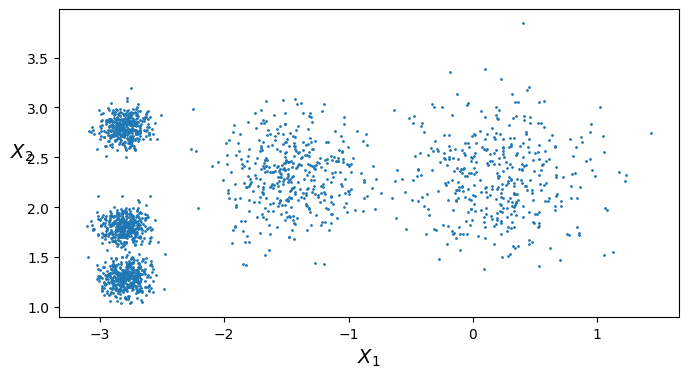

In [12]:
plt.figure(figsize=(8,4))
plot_cluster(X)
plt.show()

In [13]:
from sklearn.cluster import KMeans

In [14]:
k=5 #Because we know , or else use try-error method
kmeans=KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(X)

In [15]:
y_pred

array([3, 2, 0, ..., 2, 3, 1], dtype=int32)

In [16]:
y_pred is kmeans.labels_ #kmeans istance preserves a copy of label

True

In [17]:
kmeans.cluster_centers_ #Looks approx same as we specified

array([[-1.45140748,  2.31958553],
       [-2.79808761,  1.55306179],
       [ 0.38884446,  2.08066744],
       [-2.79846237,  2.80004584],
       [-0.01709342,  2.56932675]])

In [18]:
X_new = np.array([[0,2],[3,2],[-3,3]])
kmeans.predict(X_new)


array([2, 2, 3], dtype=int32)

In [22]:
kmeans.transform(X_new) #For hard clustering it is Euclidian distance between each instance and each centroid

array([[1.48617583, 2.83355749, 0.39712372, 2.91057812, 0.5695833 ],
       [4.46286494, 5.81528793, 2.61240128, 5.85339553, 3.07033967],
       [1.69147942, 1.46095817, 3.51133011, 0.28389977, 3.01383661]])

In [23]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[1.48617583, 2.83355749, 0.39712372, 2.91057812, 0.5695833 ],
       [4.46286494, 5.81528793, 2.61240128, 5.85339553, 3.07033967],
       [1.69147942, 1.46095817, 3.51133011, 0.28389977, 3.01383661]])

In [24]:
kmeans.inertia_ # Can be used as metric , inertia is the sum of the squared distances between each training instance and its closest centroid

226.45443592480822

In [25]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

np.float64(226.45443592480973)

In [27]:
kmeans.score(X) #Negative inertia , as greater the better

-226.4544359248082

In [28]:
kmeans.n_init #Hyperparamter , defiens number of times Kmeans run

'auto'

In [29]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42) #Init to give our prefered centroids , so its saves time and imporve inertia
kmeans.fit(X)
kmeans.inertia_

213.42177131258913

In [31]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(n_clusters=5,random_state=42)
mbk.fit(X)
mbk.inertia_

213.98498298193368

In [33]:
from sklearn.metrics import silhouette_score #(b-1)/max(a,b):a=is the mean distance to the other instances in the same cluster ,
#b=mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster
#A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters,
#while a coefficient close to 0 means that it is close to a cluster boundary, and
# finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

In [35]:
silhouette_score(X,kmeans.labels_) #Helps to determine k

np.float64(0.656578194104489)